#**INTRODUCCION**
Debido al  aumento de nuevas  cripto monedas y analizando cómo han aumentado su valor con el paso del tiempo. Decidimos analizar la rentabilidad que se puede obtener en el alza o baja de este nuevo negocio. Para eso  analizamos las distintas características que debe tener una moneda para que tenga un aumento en la bolsa o en su caso contrario tenga una disminución en su valor. Esto con el objetivo de apoyar a nuevos inversores en la toma de la decisiones de adquirir o vender activos para lograr la rentabilidad más optima 


1. Analizar el  crecimiento en las ofertas de las  cripto monedas
2. Comparar la rentabilidad entre las cripto monedas
3. Apoyo en la toma de las decisiones dependiendo del flujo que tenga la cripto moneda
4. Predecir si la cripto moneda aumenta o disminuye su valor 

In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Curso-IA/PROYECTO FINAL" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Curso-IA/PROYECTO FINAL


In [25]:
#@title **Cargar Librerias Basicas** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


In [4]:
#@title **Cargar datasets del Precio de las Criptos** { display-mode: "form" }
dBitcoin = pd.read_csv("DATA/coin_Bitcoin.csv")
dEthereum = pd.read_csv("DATA/coin_Ethereum.csv")
dDogecoin = pd.read_csv("DATA/coin_Dogecoin.csv")

In [6]:
dBitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [8]:
dEthereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [9]:
dDogecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


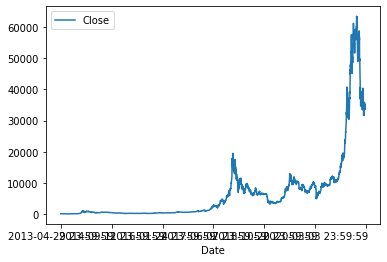

In [7]:
#@title **Graficas Valor en el mercado Bitcoin** { display-mode: "form" }
dBitcoin.plot("Date","Close")


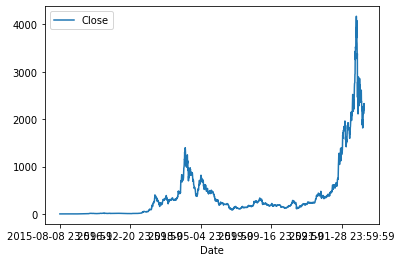

In [10]:
#@title **Graficas Valor en el mercado Ethereum** { display-mode: "form" }
dEthereum.plot("Date","Close")

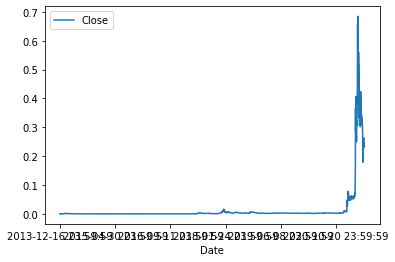

In [12]:
#@title **Graficas Valor en el mercado Dogecoin** { display-mode: "form" }
dDogecoin.plot("Date","Close")

Definimos una función para poder realizar una clasificación de cómo se comporta la criptomoneda en ese día, analizando si el precio con el que cerro el mercado ese día cambio de manera que el valor de este sube queda igual o cierra el mercado en ese día





In [14]:
def y_behavior(data):
  y = np.zeros(len(data))
  for i in range(0,len(data)):
    if(data.iloc[i][7]>data.iloc[i][6]):
      y[i] = 1
    else:
      y[i] = 0
  return y

Realizamos una repartición de 80-20 para poder definir la cantidad de datos que se usaran para entrenar los diferentes estimadores y la cantidad de datos para realizar las pruebas, para esto utilizamos la función Train Test Split

In [79]:


#Bitcoin

XBit = dBitcoin.values[:,[4,5,6]].astype("float32")
yBit = y_behavior(dBitcoin)

#Ethereum

XEth = dEthereum.values[:,[4,5,6]].astype("float32")
yEth = y_behavior(dEthereum)

#Dogecoin

XDog = dDogecoin.values[:,[4,5,6]].astype("float32")
yDog = y_behavior(dDogecoin)


def traintest(X,y):
  from sklearn.model_selection import train_test_split
  Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=21)
  return Xtrain,Xtest,ytrain,ytest
 

Definimos las funciones de los diferentes metodos que vamos a utilizar para el problema de clasificación. En este caso solo definiremos los metodos de Machine Learning vistos en la materia

In [20]:
def Gaussian(X,y):
  from sklearn.naive_bayes import GaussianNB

  Xtrain,Xtest,ytrain,ytest=traintest(X,y)
  est = GaussianNB()
  est.fit(Xtrain,ytrain)
  ypred = est.predict(Xtest)
  return accuracy_score(ypred,ytest)

def DecisionTree(X,y):
  from sklearn.tree import DecisionTreeClassifier
  Xtrain,Xtest,ytrain,ytest=traintest(X,y)
  est = DecisionTreeClassifier(max_depth=10)
  est.fit(Xtrain,ytrain)
  ypred = est.predict(Xtest)
  return accuracy_score(ypred,ytest)

def RandomForest(X,y):
  from sklearn.ensemble import RandomForestClassifier
  Xtrain,Xtest,ytrain,ytest=traintest(X,y)
  est = RandomForestClassifier()
  est.fit(Xtrain,ytrain)
  ypred = est.predict(Xtest)
  return accuracy_score(ypred,ytest)

def SVC(X,y):
  from sklearn.svm import SVC
  est = SVC()
  Xtrain,Xtest,ytrain,ytest=traintest(X,y)
  est.fit(Xtrain,ytrain)
  ypred = est.predict(Xtest)
  return accuracy_score(ypred,ytest)

#**Bitcoin** 

In [21]:
print("accuracy de los diferentes metodos para Bitcoin:")
print("accuracy Gaussian NB:")
print(Gaussian(XBit,yBit))
print("accuracy Desicion Tress:")
print(DecisionTree(XBit,yBit))
print("accuracy Random Forest:")
print(RandomForest(XBit,yBit))
print("accuracy SVC:")
print(SVC(XBit,yBit))

accuracy de los diferentes metodos para Bitcoin:
accuracy Gaussian NB:
0.544543429844098
accuracy Desicion Tress:
0.579064587973274
accuracy Random Forest:
0.6971046770601337
accuracy SVC:
0.5523385300668151


#**Ethereum** 

In [23]:
print("accuracy de los diferentes metodos para Ethereum:")
print("accuracy Gaussian NB:")
print(Gaussian(XEth,yEth))
print("accuracy Desicion Tress:")
print(DecisionTree(XEth,yEth))
print("accuracy Random Forest:")
print(RandomForest(XEth,yEth))
print("accuracy SVC:")
print(SVC(XEth,yEth))

accuracy de los diferentes metodos para Ethereum:
accuracy Gaussian NB:
0.5308641975308642
accuracy Desicion Tress:
0.5339506172839507
accuracy Random Forest:
0.7021604938271605
accuracy SVC:
0.5324074074074074


#**Dogecoin** 

In [24]:
print("accuracy de los diferentes metodos para Dogecoin:")
print("accuracy Gaussian NB:")
print(Gaussian(XEth,yEth))
print("accuracy Desicion Tress:")
print(DecisionTree(XEth,yEth))
print("accuracy Random Forest:")
print(RandomForest(XEth,yEth))
print("accuracy SVC:")
print(SVC(XEth,yEth))

accuracy de los diferentes metodos para Dogecoin:
accuracy Gaussian NB:
0.5308641975308642
accuracy Desicion Tress:
0.5339506172839507
accuracy Random Forest:
0.6990740740740741
accuracy SVC:
0.5324074074074074


## **Modelo DNN**

Para este modelo se tiene encuenta que tambien lo tomaremos como un problema de clasificacion en la que son solamente posibles dos salidas de esta red neuronal.

### **BITCOIN**

In [143]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(XBit,yBit,test_size=0.2)

Xtrain=Xtrain.astype("float32")
Xtest= Xtest.astype("float32")
ytrain_ohe = tf.keras.utils.to_categorical(ytrain, num_classes=2)
ytest_ohe = tf.keras.utils.to_categorical(ytest, num_classes=2)

In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])



In [145]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, ytrain_ohe, epochs=10)

Epoch 1/10
75/75 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5418
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5477
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5439
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5439
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5439
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5443
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5439
Epoch 8/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5439
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5439
Epoch 10/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5439


In [146]:
test_loss, test_acc = model.evaluate(Xtest, ytest_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

19/19 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5142
Test accuracy: 0.5141903162002563  test_loss:  0.6942247152328491


### **Ethereum**

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(XEth,yEth,test_size=0.2)

Xtrain=Xtrain.astype("float32")
Xtest= Xtest.astype("float32")
ytrain_ohe = tf.keras.utils.to_categorical(ytrain, num_classes=2)
ytest_ohe = tf.keras.utils.to_categorical(ytest, num_classes=2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, ytrain_ohe, epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(Xtest, ytest_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

### **Dogecoin**

In [138]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(XDog,yDog,test_size=0.2)

Xtrain=Xtrain.astype("float32")
Xtest= Xtest.astype("float32")
ytrain_ohe = tf.keras.utils.to_categorical(ytrain, num_classes=2)
ytest_ohe = tf.keras.utils.to_categorical(ytest, num_classes=2)

In [139]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [140]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, ytrain_ohe, epochs=10)

Epoch 1/10
69/69 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5190
Epoch 2/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5258
Epoch 3/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5240
Epoch 4/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5254
Epoch 5/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5258
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5263
Epoch 7/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5272
Epoch 8/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5272
Epoch 9/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5267
Epoch 10/10
69/69 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5263


In [141]:
test_loss, test_acc = model.evaluate(Xtest, ytest_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

18/18 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5562
Test accuracy: 0.5561594367027283  test_loss:  0.6895375847816467
